# Figsize and DPI #

https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size

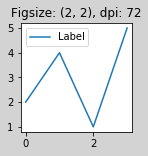

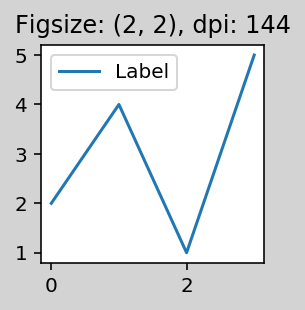

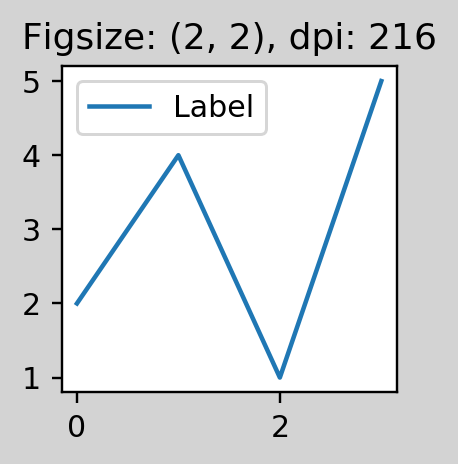

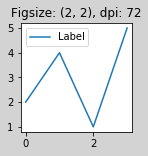

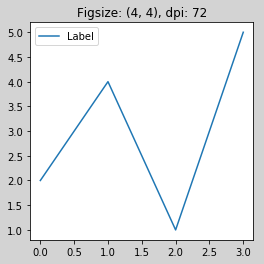

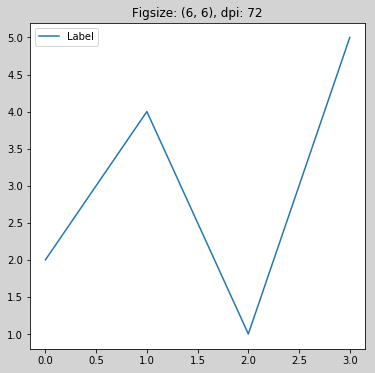

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['figure.facecolor']='lightgrey'


#plt.rcParams['axes.facecolor']='white'
#plt.rcParams['axes.facecolor']='red'
#plt.rcParams['savefig.facecolor']='red'

def plot(fs,dpi):
    fig, ax=plt.subplots(figsize=fs, dpi=dpi)
    ax.set_title("Figsize: {}, dpi: {}".format(fs,dpi))
    ax.plot([2,4,1,5], label="Label")
    ax.legend()

figsize=(2,2)
for i in range(1,4):
    plot(figsize, i*72)

dpi=72
for i in [2,4,6]:
    plot((i,i), dpi)
    
plt.show()

## For the interested reader: How do you get the dpi for your monitor? ##

The length of the display diagonal is used to describe the size of a screen. It is given in inches, e.g. a particular laptop has a 14" display. The number of pixels are also given, e.g. 1920 x 1080. This defines the aspect ratio: 1920/1080 = 16/9.

Let us assume you want to print a square figure of 4" side length (approx. 10 cm) on the computer screen. Internally Matplotlib has to use the unit 'pixel' and not 'inch'. The question arises: How many pixels on the display make a length of 4 inches? To convert from inches to pixels you have to know the pixel density or 'dots per inch (dpi)'. 

We assume square pixels of same side length horizontally and vertically. Then the number of pixels diagonally is $n_{diag} = \sqrt{1920^2 + 1080^2}$

In [2]:
from math import sqrt

len_diag = 14 # inch
print("Length of display diagonal: %.1f inch" % len_diag)

x_px, y_px = 1920,1080
print("Number of pixels in x: %d and y: %d" % (x_px, y_px))

r = float(x_px/y_px) # float only necessary in Python 2
print("Display aspect ratio: %.3f, compare to: 16/9 = %.3f" % (r, float(16/9)))

n_diag = round(sqrt(x_px**2 + y_px**2))
print("Pixels diagonally: %d" % n_diag) 

dpi = round(n_diag/len_diag)
print("=> Calculated dpi: %d" % dpi)

Length of display diagonal: 14.0 inch
Number of pixels in x: 1920 and y: 1080
Display aspect ratio: 1.778, compare to: 16/9 = 1.778
Pixels diagonally: 2203
=> Calculated dpi: 157


### Unfortunately the DPI value must be calibrated! ###

On my laptop the calculated DPI is 157. With this value the real figure size on screen deviates from the given figsize! To match intended and real size you have to calibrate. Play with the DPI value until the real size matches the intended size.

Calibration for my laptop yields 136 DPI. Anyway the figsize is still an approximate value. As soon as you add axis labels or titles the figure size (i.e. the size of the background rectangle the color of which determined by figure.facecolor) might change slightly even if initially calibrated diligently.

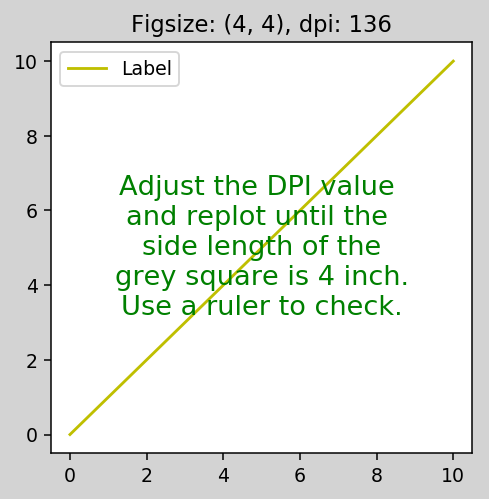

In [3]:
# On my laptop a figure of 4" x 4" is only displayed as 4" x 4" (measured with a ruler) if I choose dpi = 136. 
# So I calibrated the plot size.

# CHANGE DPI UNTIL REAL SIZE MATCHES INTENDED SIZE!
dpi = 136
plt.rcParams['figure.dpi'] = dpi

# save original background color
orig_background_color = plt.rcParams['figure.facecolor']

# Set figure facecolor (figure background color) to grey to be able to measure the full figure size.
plt.rcParams['figure.facecolor'] = 'lightgrey'

figsize = (4,4)
dpi = 136

#fig=plt.figure(figsize=(4,4)) # this figure is supposed to be 4" x 4"
#ax = fig.add

fig, ax=plt.subplots(figsize=figsize, dpi=dpi)

ax.plot(range(11), label="Label", color = "y")

ax.set_title("Figsize: {}, dpi: {}".format(figsize,dpi))
ax.legend()

ax.text(0.5, 0.5, 'Adjust the DPI value \nand replot until the \nside length of the\ngrey square is 4 inch.\nUse a ruler to check.',
        verticalalignment='center', horizontalalignment='center',
        transform=ax.transAxes,
        color='green', fontsize='x-large')

plt.show()

# restore background color
plt.rcParams['figure.facecolor'] = orig_background_color
